In [2]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [256, 256]

train_path = r'E:\Minor Project\PlantVillage(1)\train'
valid_path = r'E:\Minor Project\PlantVillage(1)\val'


In [4]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in resnet.layers:
    layer.trainable = False

In [6]:
folders = glob(r'E:\Minor Project\PlantVillage(1)\train\*')

In [7]:
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
import tensorflow as tf
from tensorflow.keras import optimizers

model.compile (loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 30591 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 9759 images belonging to 2 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\asus\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
956/956 [==============================] - 2972s 3s/step - loss: 0.5645 - accuracy: 0.7275 - true_positives: 4719.0000 - true_negatives: 17536.0000 - false_positives: 2943.0000 - false_negatives: 5393.0000 - precision: 0.6159 - recall: 0.4667 - val_loss: 0.4563 - val_accuracy: 0.8057 - val_true_positives: 2353.0000 - val_true_negatives: 5510.0000 - val_false_positives: 1233.0000 - val_false_negatives: 663.0000 - val_precision: 0.6562 - val_recall: 0.7802
Epoch 2/20
956/956 [==============================] - 2484s 3s/step - loss: 0.4692 - accuracy: 0.7850 - true_positives: 5919.0000 - true_negatives: 18094.0000 - false_positives: 2385.0000 - false_negatives: 4193.0000 - precision: 0.7128 - recall: 0.5853 - val_loss: 0.3823 - val_accuracy: 0.8285 - val_true_positives: 1571.0000 - val_true_negatives: 6514.0000 - val_false_positives: 229.0000 - val_false_negatives: 1445.0000 - val_precision: 0.8728 - val_recall: 0.5209
Epoch 3/20
956/956 [==============================] - 2481s 

956/956 [==============================] - 2366s 2s/step - loss: 0.3148 - accuracy: 0.8664 - true_positives: 7671.0000 - true_negatives: 18834.0000 - false_positives: 1645.0000 - false_negatives: 2441.0000 - precision: 0.8234 - recall: 0.7586 - val_loss: 0.3045 - val_accuracy: 0.8707 - val_true_positives: 1870.0000 - val_true_negatives: 6627.0000 - val_false_positives: 116.0000 - val_false_negatives: 1146.0000 - val_precision: 0.9416 - val_recall: 0.6200
Epoch 19/20
956/956 [==============================] - 2405s 3s/step - loss: 0.3111 - accuracy: 0.8699 - true_positives: 7725.0000 - true_negatives: 18886.0000 - false_positives: 1593.0000 - false_negatives: 2387.0000 - precision: 0.8290 - recall: 0.7639 - val_loss: 0.2746 - val_accuracy: 0.8823 - val_true_positives: 2066.0000 - val_true_negatives: 6544.0000 - val_false_positives: 199.0000 - val_false_negatives: 950.0000 - val_precision: 0.9121 - val_recall: 0.6850
Epoch 20/20
956/956 [==============================] - 2446s 3s/step - 

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

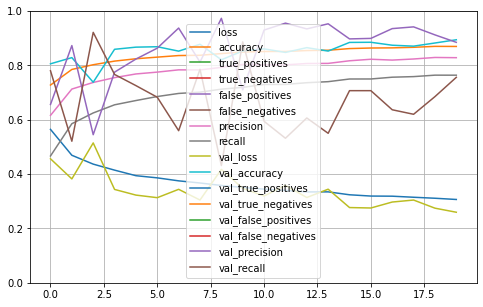

In [16]:
pd.DataFrame(r.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

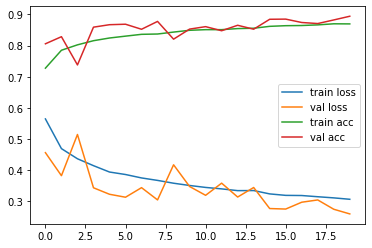

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('resnet50lossacc')

In [18]:
from tensorflow.keras.models import load_model

model.save('model_resnet50Retrain.h5')

C:\Users\asus\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [19]:
test_dir = r'E:\Minor Project\PlantVillage(1)\test'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory (
                test_dir,
                target_size=(256,256),
                batch_size=32,
                class_mode='binary')

Found 8448 images belonging to 2 classes.


In [20]:
model.evaluate(test_generator)

264/264 [==============================] - 526s 2s/step - loss: 0.2370 - accuracy: 0.9044 - true_positives: 1451.0000 - true_negatives: 6189.0000 - false_positives: 303.0000 - false_negatives: 505.0000 - precision: 0.8273 - recall: 0.7418


[0.23696231842041016,
 0.904356062412262,
 1451.0,
 6189.0,
 303.0,
 505.0,
 0.8272519707679749,
 0.7418200373649597]